# Case Studies

## Project: 1
### Week 4

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Preprocessing
### Variable transformation
Evaluate the quadratic nature of the target variable (measured_sysstolic) and transform it to a quadratic form if necessary. If the quadratic nature of the target variable is not significant, then the transformation is not necessary.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from helper_functions import *

In [2]:
# constants

# setting criterion for best subset selection
BEST_SUBSET_CRITERION = "mse"

In [3]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Large preprocessing

In [4]:
# variables that are dropped 
to_filter = ["id", "zeit", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "terminal"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

# one hot encoding cat variables to prep data for Decision Tree
# ordinal variables and nominal are treated the same in trees, but need to be careful in Lin models

encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831 entries, 0 to 14830
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bundesland           14831 non-null  object 
 1   befinden             14831 non-null  object 
 2   geschlecht           14831 non-null  object 
 3   raucher              14831 non-null  object 
 4   blutzucker_bekannt   14831 non-null  object 
 5   cholesterin_bekannt  14831 non-null  object 
 6   in_behandlung        14831 non-null  object 
 7   schaetzwert_bp_sys   14831 non-null  float64
 8   schaetzwert_by_dia   14831 non-null  float64
 9   messwert_bp_sys      14831 non-null  float64
 10  messwert_bp_dia      14831 non-null  float64
 11  age                  14831 non-null  int32  
dtypes: float64(4), int32(1), object(7)
memory usage: 1.3+ MB


In [6]:
# transforming to dummy vars
encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [7]:
print("Size of training data: ", len(encoded_train_set))
print("Size of testing data: ", len(encoded_test_set))
print("Features used: ", data_df.columns)

Size of training data:  10381
Size of testing data:  4450
Features used:  Index(['bundesland', 'befinden', 'geschlecht', 'raucher', 'blutzucker_bekannt',
       'cholesterin_bekannt', 'in_behandlung', 'schaetzwert_bp_sys',
       'schaetzwert_by_dia', 'messwert_bp_sys', 'messwert_bp_dia', 'age'],
      dtype='object')


### Models for Diastolic as target

In [8]:
target_dia = "messwert_bp_dia"
X_train_dia, Y_train_dia = separate_target(encoded_train_set, target_dia)
X_test_dia, Y_test_dia = separate_target(encoded_test_set, target_dia)

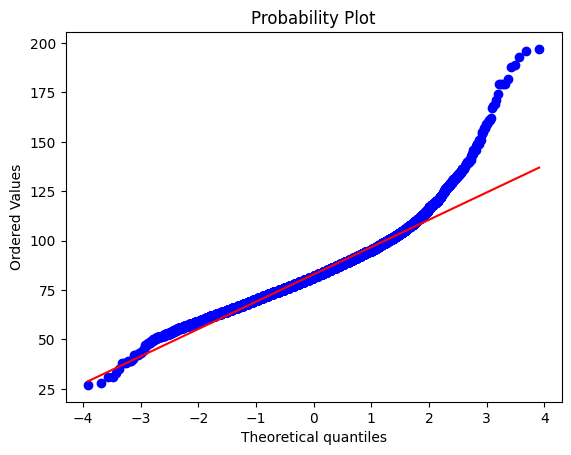

In [9]:
generate_qq_plot(data_df[target_dia])

Base Model

In [10]:
train_results_base_dia, test_results_base_dia, model_base_dia = fit_model(X_train_dia, Y_train_dia, X_test_dia,
                                                                        Y_test_dia, "LinearRegression")
model_base_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     389.6
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        13:07:16   Log-Likelihood:                -39053.
No. Observations:               10381   AIC:                         7.815e+04
Df Residuals:                   10358   BIC:                         7.832e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      16.3354      1.570     10.407      0.000      13.259      19.412
bundesland_Kärnten             -1.8918      1.433     -1.320      0.187      -4.701       0.917
bundesland_Niederösterreich    -1.6670      1.261     -1.321      0.186      -4.140       0.806
bundesland_Oberösterreich      -0.7168      1.398     -0.513      0.608      -3.457       2.024
bundesland_Salzburg            -1.2220      1.822     -0.671      0.502      -4.793       2.349
bundesland_Steiermark          -1.6204      1.111     -1.458      0.145      -3.799       0.558
bundesland_Tirol               -1.3724      1.895     -0.724      0.469      -5.087       2.342
bundesland_Vorarlberg           1.3231      2.484      0.533      0.594      -3.546       6.193
bundesland_Wien                -0.0691      1.246     -0.055      0.956      -2.512       2.373
bundesland_not_applicable      -0.8685      1.344     -0.646      0.518      -3.503       1.766
befinden_2                     -0.7541      0.230     -3.273      0.001      -1.206      -0.302
befinden_3                     -0.6156      0.331     -1.857      0.063      -1.265       0.034
befinden_4                      0.3593      0.969      0.371      0.711      -1.540       2.259
befinden_5                      3.6762      1.661      2.214      0.027       0.421       6.931
geschlecht_m                    0.9210      0.212      4.337      0.000       0.505       1.337
raucher_True                    0.1400      0.283      0.495      0.621      -0.415       0.695
blutzucker_bekannt_True         0.0938      0.290      0.324      0.746      -0.474       0.662
cholesterin_bekannt_True        0.0736      0.269      0.274      0.784      -0.454       0.601
in_behandlung_True             -1.8477      0.337     -5.478      0.000      -2.509      -1.187
schaetzwert_bp_sys             -0.0251      0.008     -3.160      0.002      -0.041      -0.010
schaetzwert_by_dia              0.1508      0.013     11.825      0.000       0.126       0.176
messwert_bp_sys                 0.4987      0.006     84.197      0.000       0.487       0.510
age                            -0.0761      0.007    -10.367      0.000      -0.090      -0.062
==============================================================================
Omnibus:                     1274.151   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4066.498
Skew:                           0.633   Prob(JB):                         0.00
Kurtosis:                       5.793   Cond. No.                     7.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

In [11]:
print(model_base_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      16.3354  &        1.570     &    10.407  &         0.000        &       13.259    &       19.412     \\
\textbf{bundesland\_Kärnten}          &      -1.8918  &        1.433     &    -1.320  &         0.187        &       -4.701    &        0.917     \\
\textbf{bundesland\_Niederösterreich} &      -1.6670  &        1.261     &    -1.321  &         0.186        &       -4.140    &        0.806     \\
\textbf{bundesland\_Oberösterreich}   &      -0.7168  &        1.398     &    -0.513  &         0.608        &       -3.457    &        2.024     \\
\textbf{bundesland\_Salzburg}         &      -1.2220  &        1.822     &    -0.671  &         0.502        &       -4.793    &        2.349     \\
\textbf{bundesland\_Steiermark}       &      -1.6

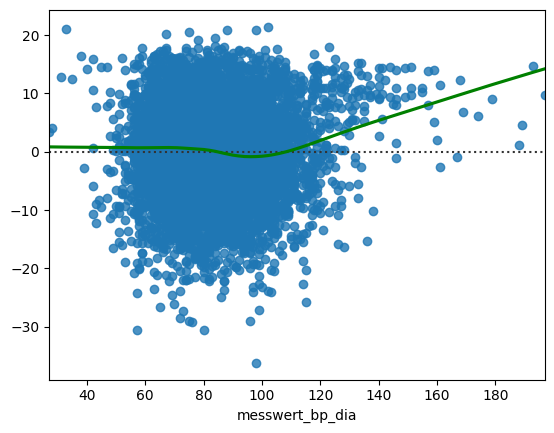

In [12]:
generate_residual_plot(Y_train_dia, model_base_dia)

Log Model

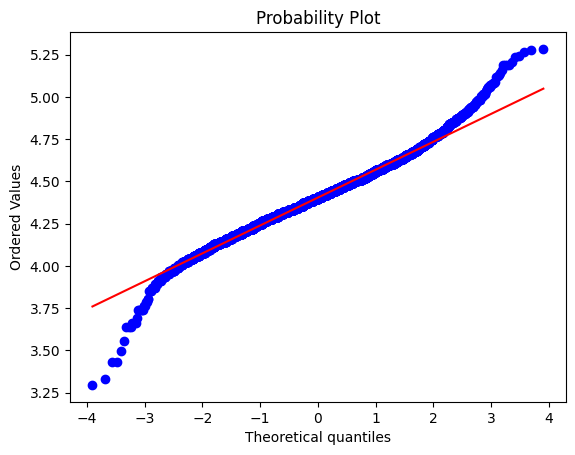

In [13]:
generate_qq_plot(np.log(data_df[target_dia]))

In [14]:
train_results_base_log_dia, test_results_base_log_dia, model_base_log_dia = fit_model(X_train_dia, np.log(Y_train_dia), X_test_dia,
                                                                        np.log(Y_test_dia), "LinearRegression")
model_base_log_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     393.2
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        13:07:17   Log-Likelihood:                 7092.1
No. Observations:               10381   AIC:                        -1.414e+04
Df Residuals:                   10358   BIC:                        -1.397e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.6118      0.018    196.088      0.000       3.576       3.648
bundesland_Kärnten             -0.0245      0.017     -1.460      0.144      -0.058       0.008
bundesland_Niederösterreich    -0.0212      0.015     -1.435      0.151      -0.050       0.008
bundesland_Oberösterreich      -0.0154      0.016     -0.940      0.347      -0.048       0.017
bundesland_Salzburg            -0.0127      0.021     -0.593      0.553      -0.055       0.029
bundesland_Steiermark          -0.0212      0.013     -1.624      0.104      -0.047       0.004
bundesland_Tirol               -0.0247      0.022     -1.111      0.267      -0.068       0.019
bundesland_Vorarlberg           0.0149      0.029      0.512      0.609      -0.042       0.072
bundesland_Wien                -0.0031      0.015     -0.209      0.834      -0.032       0.026
bundesland_not_applicable      -0.0142      0.016     -0.902      0.367      -0.045       0.017
befinden_2                     -0.0109      0.003     -4.047      0.000      -0.016      -0.006
befinden_3                     -0.0109      0.004     -2.793      0.005      -0.018      -0.003
befinden_4                  -9.944e-05      0.011     -0.009      0.993      -0.022       0.022
befinden_5                      0.0282      0.019      1.445      0.148      -0.010       0.066
geschlecht_m                    0.0090      0.002      3.610      0.000       0.004       0.014
raucher_True                    0.0024      0.003      0.721      0.471      -0.004       0.009
blutzucker_bekannt_True        -0.0003      0.003     -0.075      0.940      -0.007       0.006
cholesterin_bekannt_True        0.0022      0.003      0.712      0.477      -0.004       0.008
in_behandlung_True             -0.0242      0.004     -6.122      0.000      -0.032      -0.016
schaetzwert_bp_sys             -0.0003   9.34e-05     -3.219      0.001      -0.000      -0.000
schaetzwert_by_dia              0.0019      0.000     12.806      0.000       0.002       0.002
messwert_bp_sys                 0.0059   6.95e-05     84.415      0.000       0.006       0.006
age                            -0.0008   8.61e-05     -9.701      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      358.859   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              809.422
Skew:                          -0.202   Prob(JB):                    1.72e-176
Kurtosis:                       4.307   Cond. No.                     7.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

In [15]:
print(model_base_log_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &       3.6118  &        0.018     &   196.088  &         0.000        &        3.576    &        3.648     \\
\textbf{bundesland\_Kärnten}          &      -0.0245  &        0.017     &    -1.460  &         0.144        &       -0.058    &        0.008     \\
\textbf{bundesland\_Niederösterreich} &      -0.0212  &        0.015     &    -1.435  &         0.151        &       -0.050    &        0.008     \\
\textbf{bundesland\_Oberösterreich}   &      -0.0154  &        0.016     &    -0.940  &         0.347        &       -0.048    &        0.017     \\
\textbf{bundesland\_Salzburg}         &      -0.0127  &        0.021     &    -0.593  &         0.553        &       -0.055    &        0.029     \\
\textbf{bundesland\_Steiermark}       &      -0.0

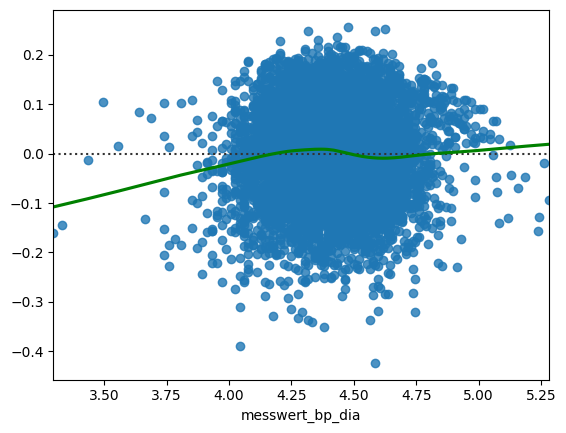

In [16]:
generate_residual_plot(np.log(Y_train_dia), model_base_log_dia)

Best Subset

In [17]:
model_type = "LinearRegression"
features = list(X_train_dia.columns)
model_best_dia, test_results_best_dia, train_results_best_dia = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_dia, Y_train_dia, X_test_dia, Y_test_dia,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys', 'age']
Train Results:  {'r_2': 0.4521612384234127, 'adjusted_r_2': 0.45147426013649306, 'mse': 108.5646874102962}
Test Results:  {'r_2': 0.4636073985305881, 'adjusted_r_2': 0.4620354634947219, 'mse': 111.3576302365134}


In [18]:
model_best_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     658.2
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        13:07:27   Log-Likelihood:                -39060.
No. Observations:               10381   AIC:                         7.815e+04
Df Residuals:                   10367   BIC:                         7.825e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   14.8060      1.108     13.360      0.000      12.634      16.978
befinden_2                  -0.7619      0.230     -3.308      0.001      -1.213      -0.310
befinden_3                  -0.6046      0.331     -1.826      0.068      -1.254       0.044
befinden_4                   0.3729      0.969      0.385      0.700      -1.526       2.272
befinden_5                   3.8226      1.659      2.304      0.021       0.570       7.075
geschlecht_m                 0.9347      0.212      4.405      0.000       0.519       1.351
raucher_True                 0.1121      0.283      0.396      0.692      -0.442       0.666
blutzucker_bekannt_True      0.1210      0.289      0.418      0.676      -0.446       0.688
cholesterin_bekannt_True     0.0751      0.269      0.280      0.780      -0.452       0.602
in_behandlung_True          -1.8281      0.337     -5.424      0.000      -2.489      -1.167
schaetzwert_bp_sys          -0.0248      0.008     -3.116      0.002      -0.040      -0.009
schaetzwert_by_dia           0.1505      0.013     11.808      0.000       0.126       0.176
messwert_bp_sys              0.4984      0.006     84.190      0.000       0.487       0.510
age                         -0.0760      0.007    -10.366      0.000      -0.090      -0.062
==============================================================================
Omnibus:                     1269.574   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4056.278
Skew:                           0.630   Prob(JB):                         0.00
Kurtosis:                       5.791   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
print(model_best_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                    & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                  &      14.8060  &        1.108     &    13.360  &         0.000        &       12.634    &       16.978     \\
\textbf{befinden\_2}                &      -0.7619  &        0.230     &    -3.308  &         0.001        &       -1.213    &       -0.310     \\
\textbf{befinden\_3}                &      -0.6046  &        0.331     &    -1.826  &         0.068        &       -1.254    &        0.044     \\
\textbf{befinden\_4}                &       0.3729  &        0.969     &     0.385  &         0.700        &       -1.526    &        2.272     \\
\textbf{befinden\_5}                &       3.8226  &        1.659     &     2.304  &         0.021        &        0.570    &        7.075     \\
\textbf{geschlecht\_m}              &       0.9347  &        

Best Subset Log

In [20]:
model_type = "LinearRegression"
features = list(X_train_dia.columns)
model_best_log_dia, test_results_best_log_dia, train_results_best_log_dia = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_dia, np.log(Y_train_dia), X_test_dia, np.log(Y_test_dia),
                                                     model_type, {}, 1)


Best Model: 
Features:  ['befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys', 'age']
Train Results:  {'r_2': 0.45445366691327815, 'adjusted_r_2': 0.45376956328347906, 'mse': 0.01494998681179489}
Test Results:  {'r_2': 0.46961219248458996, 'adjusted_r_2': 0.46805785490620855, 'mse': 0.014729461236045011}


In [21]:
model_best_log_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     664.3
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        13:07:36   Log-Likelihood:                 7085.9
No. Observations:               10381   AIC:                        -1.414e+04
Df Residuals:                   10367   BIC:                        -1.404e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.5915      0.013    276.171      0.000       3.566       3.617
befinden_2                  -0.0110      0.003     -4.080      0.000      -0.016      -0.006
befinden_3                  -0.0108      0.004     -2.767      0.006      -0.018      -0.003
befinden_4                6.395e-05      0.011      0.006      0.996      -0.022       0.022
befinden_5                   0.0297      0.019      1.525      0.127      -0.008       0.068
geschlecht_m                 0.0091      0.002      3.659      0.000       0.004       0.014
raucher_True                 0.0021      0.003      0.641      0.522      -0.004       0.009
blutzucker_bekannt_True   3.816e-05      0.003      0.011      0.991      -0.007       0.007
cholesterin_bekannt_True     0.0023      0.003      0.727      0.467      -0.004       0.008
in_behandlung_True          -0.0240      0.004     -6.059      0.000      -0.032      -0.016
schaetzwert_bp_sys          -0.0003   9.34e-05     -3.185      0.001      -0.000      -0.000
schaetzwert_by_dia           0.0019      0.000     12.793      0.000       0.002       0.002
messwert_bp_sys              0.0059   6.95e-05     84.423      0.000       0.006       0.006
age                         -0.0008    8.6e-05     -9.692      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      361.099   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              811.961
Skew:                          -0.206   Prob(JB):                    4.84e-177
Kurtosis:                       4.307   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
print(model_best_log_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                    & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                  &       3.5915  &        0.013     &   276.171  &         0.000        &        3.566    &        3.617     \\
\textbf{befinden\_2}                &      -0.0110  &        0.003     &    -4.080  &         0.000        &       -0.016    &       -0.006     \\
\textbf{befinden\_3}                &      -0.0108  &        0.004     &    -2.767  &         0.006        &       -0.018    &       -0.003     \\
\textbf{befinden\_4}                &    6.395e-05  &        0.011     &     0.006  &         0.996        &       -0.022    &        0.022     \\
\textbf{befinden\_5}                &       0.0297  &        0.019     &     1.525  &         0.127        &       -0.008    &        0.068     \\
\textbf{geschlecht\_m}              &       0.0091  &        

In [23]:
generate_residual_plot(np.log(Y_train_dia), model_best_log_dia)

NameError: name 'Y_train_sys' is not defined

In [ ]:
train_result_list = [train_results_base_dia, train_results_base_log_dia, train_results_best_dia, train_results_best_log_dia]

test_result_list = [test_results_base_dia, test_results_base_log_dia, test_results_best_dia, test_results_best_log_dia]

model_names = ["LM (Base)", "LM Log", "LM (Best Subset)", "LM Log (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),108.402,111.723,0.453,0.462,0.452,0.459
1,LM (Best Subset),0.015,0.015,0.457,0.465,0.455,0.462
2,LM Log,111.457,108.536,0.463,0.452,0.462,0.451
3,LM Log (Best Subset),0.015,0.015,0.466,0.456,0.464,0.455


In [ ]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 108.402089 & 111.722714 & 0.452916 & 0.462009 & 0.451754 & 0.459336 \\
1 & LM (Best Subset) & 0.014710 & 0.015288 & 0.456510 & 0.464622 & 0.455356 & 0.461962 \\
2 & LM Log & 111.456985 & 108.536258 & 0.463289 & 0.452239 & 0.461595 & 0.451499 \\
3 & LM Log (Best Subset) & 0.015253 & 0.014728 & 0.465832 & 0.455835 & 0.464146 & 0.455100 \\
\bottomrule
\end{tabular}



### Models for Systolic as target

In [ ]:
target_sys = "messwert_bp_sys"
X_train_sys, Y_train_sys = separate_target(encoded_train_set, target_sys)
X_test_sys, Y_test_sys = separate_target(encoded_test_set, target_sys)

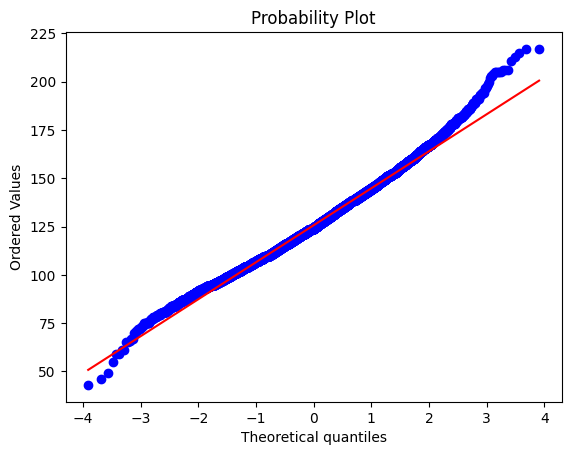

In [ ]:
generate_qq_plot(data_df[target_sys])

Base Model

In [ ]:
train_results_base_sys, test_results_base_sys, model_base_sys = fit_model(X_train_sys, Y_train_sys, X_test_sys,
                                                                        Y_test_sys, "LinearRegression")
model_base_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     515.9
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:24:37   Log-Likelihood:                -41485.
No. Observations:               10381   AIC:                         8.302e+04
Df Residuals:                   10358   BIC:                         8.318e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      29.7249      2.031     14.635      0.000      25.743      33.706
bundesland_Kärnten              2.3214      1.897      1.224      0.221      -1.396       6.039
bundesland_Niederösterreich    -0.1693      1.672     -0.101      0.919      -3.446       3.107
bundesland_Oberösterreich       0.8277      1.852      0.447      0.655      -2.803       4.458
bundesland_Salzburg            -1.2488      2.298     -0.543      0.587      -5.753       3.255
bundesland_Steiermark           1.3284      1.499      0.886      0.376      -1.611       4.267
bundesland_Tirol               -1.2331      2.451     -0.503      0.615      -6.038       3.572
bundesland_Vorarlberg          -4.2020      3.530     -1.190      0.234     -11.122       2.718
bundesland_Wien                 0.4762      1.667      0.286      0.775      -2.791       3.743
bundesland_not_applicable       0.4514      1.784      0.253      0.800      -3.045       3.948
befinden_2                      0.6700      0.291      2.301      0.021       0.099       1.241
befinden_3                     -0.0130      0.419     -0.031      0.975      -0.833       0.807
befinden_4                     -0.0820      1.201     -0.068      0.946      -2.437       2.273
befinden_5                     -3.0146      2.099     -1.436      0.151      -7.130       1.101
geschlecht_m                    1.7451      0.268      6.508      0.000       1.219       2.271
raucher_True                   -0.4006      0.360     -1.114      0.265      -1.105       0.304
blutzucker_bekannt_True         0.9375      0.368      2.546      0.011       0.216       1.659
cholesterin_bekannt_True       -0.6085      0.342     -1.778      0.075      -1.279       0.062
in_behandlung_True              4.7782      0.426     11.207      0.000       3.942       5.614
schaetzwert_bp_sys              0.1711      0.010     16.990      0.000       0.151       0.191
schaetzwert_by_dia             -0.0570      0.016     -3.534      0.000      -0.089      -0.025
messwert_bp_dia                 0.8069      0.010     84.388      0.000       0.788       0.826
age                             0.2160      0.009     23.615      0.000       0.198       0.234
==============================================================================
Omnibus:                       90.466   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.334
Skew:                           0.169   Prob(JB):                     8.12e-24
Kurtosis:                       3.363   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

In [ ]:
print(model_base_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      29.7249  &        2.031     &    14.635  &         0.000        &       25.743    &       33.706     \\
\textbf{bundesland\_Kärnten}          &       2.3214  &        1.897     &     1.224  &         0.221        &       -1.396    &        6.039     \\
\textbf{bundesland\_Niederösterreich} &      -0.1693  &        1.672     &    -0.101  &         0.919        &       -3.446    &        3.107     \\
\textbf{bundesland\_Oberösterreich}   &       0.8277  &        1.852     &     0.447  &         0.655        &       -2.803    &        4.458     \\
\textbf{bundesland\_Salzburg}         &      -1.2488  &        2.298     &    -0.543  &         0.587        &       -5.753    &        3.255     \\
\textbf{bundesland\_Steiermark}       &       1.3

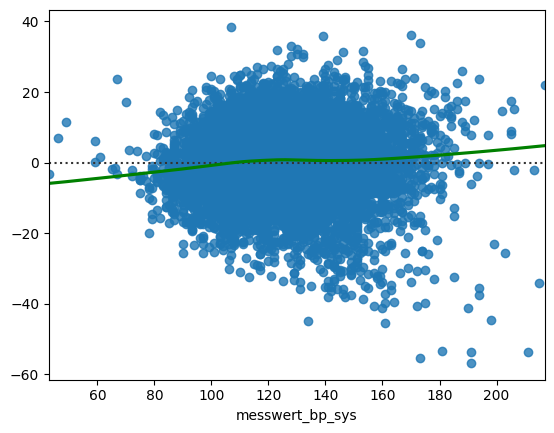

In [ ]:
generate_residual_plot(Y_train_sys, model_base_sys)

Base Log Model

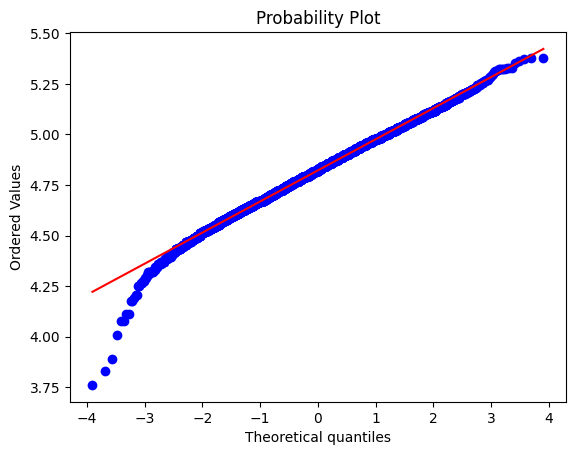

In [ ]:
generate_qq_plot(np.log(data_df[target_sys]))

In [ ]:
train_results_base_log_sys, test_results_base_log_sys, model_base_log_sys = fit_model(X_train_sys, np.log(Y_train_sys), X_test_sys,
                                                                        np.log(Y_test_sys), "LinearRegression")
model_base_log_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     488.5
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:24:38   Log-Likelihood:                 8499.3
No. Observations:               10381   AIC:                        -1.695e+04
Df Residuals:                   10358   BIC:                        -1.679e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       4.0597      0.016    246.551      0.000       4.027       4.092
bundesland_Kärnten              0.0192      0.015      1.248      0.212      -0.011       0.049
bundesland_Niederösterreich    -0.0017      0.014     -0.125      0.900      -0.028       0.025
bundesland_Oberösterreich       0.0029      0.015      0.190      0.849      -0.027       0.032
bundesland_Salzburg            -0.0140      0.019     -0.751      0.453      -0.050       0.023
bundesland_Steiermark           0.0098      0.012      0.809      0.418      -0.014       0.034
bundesland_Tirol               -0.0132      0.020     -0.663      0.507      -0.052       0.026
bundesland_Vorarlberg          -0.0319      0.029     -1.116      0.265      -0.088       0.024
bundesland_Wien                 0.0010      0.014      0.071      0.943      -0.026       0.027
bundesland_not_applicable      -0.0004      0.014     -0.025      0.980      -0.029       0.028
befinden_2                      0.0040      0.002      1.700      0.089      -0.001       0.009
befinden_3                     -0.0013      0.003     -0.387      0.699      -0.008       0.005
befinden_4                      0.0010      0.010      0.107      0.914      -0.018       0.020
befinden_5                     -0.0244      0.017     -1.433      0.152      -0.058       0.009
geschlecht_m                    0.0151      0.002      6.940      0.000       0.011       0.019
raucher_True                   -0.0026      0.003     -0.899      0.369      -0.008       0.003
blutzucker_bekannt_True         0.0066      0.003      2.223      0.026       0.001       0.012
cholesterin_bekannt_True       -0.0042      0.003     -1.522      0.128      -0.010       0.001
in_behandlung_True              0.0337      0.003      9.753      0.000       0.027       0.040
schaetzwert_bp_sys              0.0013   8.16e-05     16.359      0.000       0.001       0.001
schaetzwert_by_dia             -0.0004      0.000     -2.757      0.006      -0.001      -0.000
messwert_bp_dia                 0.0064   7.75e-05     82.217      0.000       0.006       0.007
age                             0.0017   7.42e-05     23.259      0.000       0.002       0.002
==============================================================================
Omnibus:                      223.587   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.399
Skew:                          -0.275   Prob(JB):                     5.29e-64
Kurtosis:                       3.609   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

In [ ]:
print(model_base_log_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &       4.0597  &        0.016     &   246.551  &         0.000        &        4.027    &        4.092     \\
\textbf{bundesland\_Kärnten}          &       0.0192  &        0.015     &     1.248  &         0.212        &       -0.011    &        0.049     \\
\textbf{bundesland\_Niederösterreich} &      -0.0017  &        0.014     &    -0.125  &         0.900        &       -0.028    &        0.025     \\
\textbf{bundesland\_Oberösterreich}   &       0.0029  &        0.015     &     0.190  &         0.849        &       -0.027    &        0.032     \\
\textbf{bundesland\_Salzburg}         &      -0.0140  &        0.019     &    -0.751  &         0.453        &       -0.050    &        0.023     \\
\textbf{bundesland\_Steiermark}       &       0.0

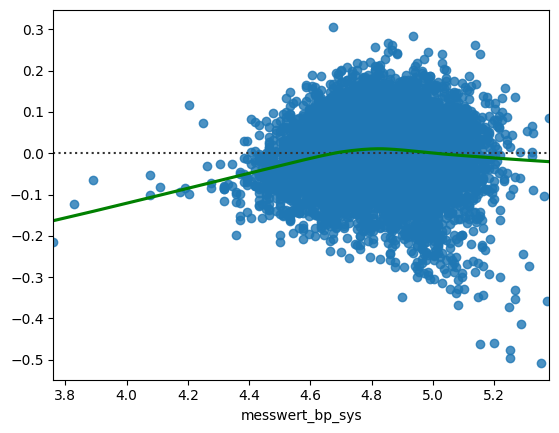

In [ ]:
generate_residual_plot(np.log(Y_train_sys), model_base_log_sys)

Base Best Subset

In [ ]:
model_type = "LinearRegression"
features = list(X_train_sys.columns)
model_best_sys, test_results_best_sys, train_results_best_sys = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_sys, Y_train_sys, X_test_sys, Y_test_sys,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_dia', 'age']
Train Results:  {'r_2': 0.5198562280514022, 'adjusted_r_2': 0.5194858896233663, 'mse': 174.32139014430342}
Test Results:  {'r_2': 0.5259030201162891, 'adjusted_r_2': 0.5250489836742558, 'mse': 183.14935574884868}


In [ ]:
model_best_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     1404.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:24:45   Log-Likelihood:                -41518.
No. Observations:               10381   AIC:                         8.305e+04
Df Residuals:                   10372   BIC:                         8.312e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   30.1522      1.359     22.187      0.000      27.488      32.816
raucher_True                -0.3460      0.359     -0.963      0.336      -1.051       0.359
blutzucker_bekannt_True      0.8665      0.369      2.351      0.019       0.144       1.589
cholesterin_bekannt_True    -0.6893      0.342     -2.013      0.044      -1.360      -0.018
in_behandlung_True           4.6676      0.425     10.973      0.000       3.834       5.501
schaetzwert_bp_sys           0.1773      0.010     17.682      0.000       0.158       0.197
schaetzwert_by_dia          -0.0503      0.016     -3.117      0.002      -0.082      -0.019
messwert_bp_dia              0.8119      0.010     85.165      0.000       0.793       0.831
age                          0.2201      0.009     24.245      0.000       0.202       0.238
==============================================================================
Omnibus:                       91.538   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.919
Skew:                           0.175   Prob(JB):                     1.00e-23
Kurtosis:                       3.349   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print(model_best_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                    & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                  &      30.1522  &        1.359     &    22.187  &         0.000        &       27.488    &       32.816     \\
\textbf{raucher\_True}              &      -0.3460  &        0.359     &    -0.963  &         0.336        &       -1.051    &        0.359     \\
\textbf{blutzucker\_bekannt\_True}  &       0.8665  &        0.369     &     2.351  &         0.019        &        0.144    &        1.589     \\
\textbf{cholesterin\_bekannt\_True} &      -0.6893  &        0.342     &    -2.013  &         0.044        &       -1.360    &       -0.018     \\
\textbf{in\_behandlung\_True}       &       4.6676  &        0.425     &    10.973  &         0.000        &        3.834    &        5.501     \\
\textbf{schaetzwert\_bp\_sys}       &       0.1773  &        

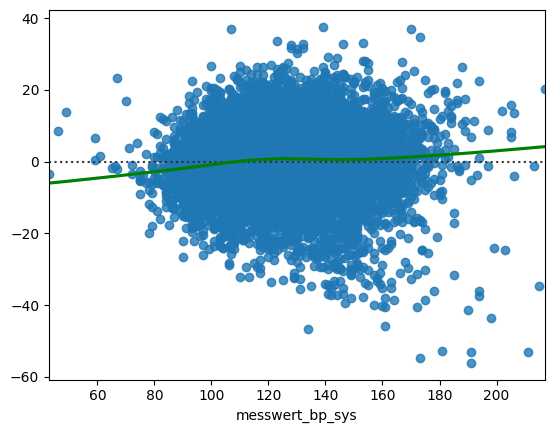

In [ ]:
generate_residual_plot(Y_train_sys, model_best_sys)

Best Subset Log Model

In [ ]:
model_type = "LinearRegression"
features = list(X_train_sys.columns)
model_best_log_sys, test_results_best_log_sys, train_results_best_log_sys = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_sys, np.log(Y_train_sys), X_test_sys, np.log(Y_test_sys),
                                                     model_type, {}, 1)


Best Model: 
Features:  ['raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_dia', 'age']
Train Results:  {'r_2': 0.5059036032455926, 'adjusted_r_2': 0.5055225030552691, 'mse': 0.011463266239714236}
Test Results:  {'r_2': 0.5098923142432954, 'adjusted_r_2': 0.5090094361784331, 'mse': 0.012182724192725607}


In [ ]:
model_best_log_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     1327.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:24:52   Log-Likelihood:                 8464.3
No. Observations:               10381   AIC:                        -1.691e+04
Df Residuals:                   10372   BIC:                        -1.685e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.0611      0.011    368.500      0.000       4.040       4.083
raucher_True                -0.0022      0.003     -0.755      0.450      -0.008       0.004
blutzucker_bekannt_True      0.0061      0.003      2.028      0.043       0.000       0.012
cholesterin_bekannt_True    -0.0049      0.003     -1.761      0.078      -0.010       0.001
in_behandlung_True           0.0326      0.003      9.459      0.000       0.026       0.039
schaetzwert_bp_sys           0.0014   8.13e-05     17.075      0.000       0.001       0.002
schaetzwert_by_dia          -0.0003      0.000     -2.327      0.020      -0.001    -4.8e-05
messwert_bp_dia              0.0064   7.73e-05     83.028      0.000       0.006       0.007
age                          0.0018   7.36e-05     23.800      0.000       0.002       0.002
==============================================================================
Omnibus:                      209.654   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.483
Skew:                          -0.264   Prob(JB):                     6.78e-60
Kurtosis:                       3.593   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print(model_best_log_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                    & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                  &       4.0611  &        0.011     &   368.500  &         0.000        &        4.040    &        4.083     \\
\textbf{raucher\_True}              &      -0.0022  &        0.003     &    -0.755  &         0.450        &       -0.008    &        0.004     \\
\textbf{blutzucker\_bekannt\_True}  &       0.0061  &        0.003     &     2.028  &         0.043        &        0.000    &        0.012     \\
\textbf{cholesterin\_bekannt\_True} &      -0.0049  &        0.003     &    -1.761  &         0.078        &       -0.010    &        0.001     \\
\textbf{in\_behandlung\_True}       &       0.0326  &        0.003     &     9.459  &         0.000        &        0.026    &        0.039     \\
\textbf{schaetzwert\_bp\_sys}       &       0.0014  &     8.1

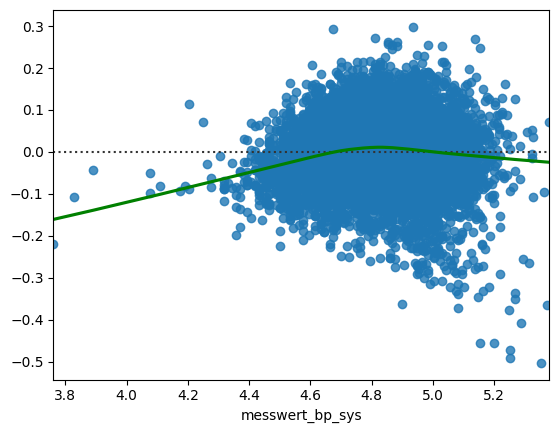

In [ ]:
generate_residual_plot(np.log(Y_train_sys), model_best_log_sys)

In [ ]:
train_result_list = [train_results_base_sys, train_results_base_log_sys, train_results_best_sys, train_results_best_log_sys]

test_result_list = [test_results_base_sys, test_results_base_log_sys, test_results_best_sys, test_results_best_log_sys]

model_names = ["LM (Base)", "LM Log", "LM (Best Subset)", "LM Log (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),173.244,183.631,0.523,0.525,0.522,0.522
1,LM (Best Subset),0.011,0.012,0.509,0.509,0.508,0.506
2,LM Log,183.149,174.321,0.526,0.520,0.525,0.519
3,LM Log (Best Subset),0.012,0.011,0.510,0.506,0.509,0.506


In [ ]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 173.244312 & 183.631458 & 0.522823 & 0.524655 & 0.521809 & 0.522293 \\
1 & LM (Best Subset) & 0.011386 & 0.012207 & 0.509227 & 0.508917 & 0.508185 & 0.506477 \\
2 & LM Log & 183.149356 & 174.321390 & 0.525903 & 0.519856 & 0.525049 & 0.519486 \\
3 & LM Log (Best Subset) & 0.012183 & 0.011463 & 0.509892 & 0.505904 & 0.509009 & 0.505523 \\
\bottomrule
\end{tabular}

